**Leekhith Nunna**

**BL.EN.U4AIE23060**

Importing all required Library

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

A1. If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model. Sample code
suggested below.
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
(P.S.: If your project deals with a classification or clustering problem, please consider one of the
attributes with numerical values as target values.)

In [53]:
file_path = "/content/restaurant_reviews.xlsx"
df = pd.read_excel(file_path)

# Selecting one numerical attribute (e.g., "F1-AWL") as feature and "Real" as target
X = df[['F1-AWL']]  # Feature
y = df['Real']       # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the training data
y_train_pred = reg.predict(X_train)

print("Intercept:", reg.intercept_)
print("Coefficient:", reg.coef_[0])

Intercept: -0.1502289841780834
Coefficient: 0.1743005283372125


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.
Perform prediction on the test data and compare the metric values between train and test set.

In [54]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {"MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

# Predict on test data
y_test_pred = reg.predict(X_test)

# Evaluate train and test sets
train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

print("Training Set Metrics:", train_metrics)
print("Test Set Metrics:", test_metrics)

Training Set Metrics: {'MSE': 0.24658181858838255, 'RMSE': 0.4965700540592259, 'MAPE': inf, 'R2': 0.011630640192321628}
Test Set Metrics: {'MSE': 0.26212007927258313, 'RMSE': 0.5119766393817038, 'MAPE': inf, 'R2': -0.08432579801649798}


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [55]:
# only numerical features and define target variable
X = df.select_dtypes(include=['number']).drop(columns=['Real'], errors='ignore')
y = df["Real"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg_multi = LinearRegression().fit(X_train, y_train)

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return {
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "MAPE": np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        "R²": r2_score(y_true, y_pred)
    }

# Get evaluation metrics
train_metrics = evaluate_model(y_train, reg_multi.predict(X_train))
test_metrics = evaluate_model(y_test, reg_multi.predict(X_test))

print(f"Intercept: {reg_multi.intercept_}")
print(f"Coefficients: {reg_multi.coef_}\n")

print("Training Set Metrics:", train_metrics)
print("Test Set Metrics:", test_metrics)

Intercept: -0.035745442085566737
Coefficients: [-0.3407528   0.19093135  0.17330242  0.00777408 -0.04071903 -0.01888504
  0.00258205  0.00562062 -0.00413716 -0.08218111 -0.00606759  0.45008151
  0.02408283 -0.350753    0.10541757 -0.12220844]

Training Set Metrics: {'MSE': 0.051060208150738126, 'RMSE': 0.22596505957943613, 'MAPE': inf, 'R²': 0.7953363085303747}
Test Set Metrics: {'MSE': 0.0763855159070497, 'RMSE': 0.2763792971751859, 'MAPE': inf, 'R²': 0.6840120538545977}


A4. Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering. Sample code suggested below.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0,
n_init="auto").fit(X_train)
kmeans.labels_
kmeans.cluster_centers_
(P.S.: Above code uses k = 2.)

In [56]:
# numerical features (excluding 'Real')
X_cluster = df.select_dtypes(include=['number']).drop(columns=['Real'], errors='ignore')

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_cluster)

print("Cluster Labels:", kmeans.labels_)
print("\nCluster Centers:\n", kmeans.cluster_centers_)

Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Cluster Centers:
 [[8.33333333e-02 3.83830686e+00 2.07244746e+00 1.06643110e+01
  1.98228600e+01 1.05000000e+01 1.87750000e+02 1.91666667e+01
  1.90833333e+01 1.66666667e-01 6.96562261e-01 8.70282417e-01
  1.04124792e+01 6.73634943e-01 1.16666667e+00 1.33333333e+00]
 [1.33673469e+00 3.85985501e+00 1.38504087e+00 1.02782756e+01
  1.40487809e+01 5.45918367e+00 7.30408163e+01 7.61224490e+00
  6.43877551e+00 1.83673469e-01 6.77553798e-01 8.96549853e-01
  7.42167962e+00 7.86313760e-01 5.91836735e-01 1.73469388e-01]]


A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
silhouette_score(X_train, kmeans.labels_)
calinski_harabasz_score(X_train, kmeans.labels_)
davies_bouldin_score(X_train, kmeans.labels_)

In [57]:
# Selecting numerical features (excluding 'Real')
X_cluster = df.select_dtypes(include=['number']).drop(columns=['Real'], errors='ignore')

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_cluster)

# Function to compute clustering evaluation metrics
def evaluate_clustering(X, labels):
    return {
        "Silhouette Score": silhouette_score(X, labels),
        "Calinski-Harabasz Score": calinski_harabasz_score(X, labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, labels)
    }

# Get evaluation results
metrics = evaluate_clustering(X_cluster, kmeans.labels_)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Silhouette Score: 0.5843
Calinski-Harabasz Score: 150.8520
Davies-Bouldin Index: 0.6954


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.


In [58]:
X_cluster = df.select_dtypes(include=['number']).drop(columns=['Real'], errors='ignore')

# Range of k values
k_values = range(2, 11)

# Lists to store metric values
silhouette_scores = []
ch_scores = []
db_scores = []

# Loop through different k values, apply KMeans, and compute evaluation scores
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    model.fit(X_cluster)

    labels = model.labels_
    silhouette_scores.append(silhouette_score(X_cluster, labels))
    ch_scores.append(calinski_harabasz_score(X_cluster, labels))
    db_scores.append(davies_bouldin_score(X_cluster, labels))

# Store results in a DataFrame for easy viewing
metrics_df = pd.DataFrame({
    "k": k_values,
    "Silhouette Score": silhouette_scores,
    "Calinski-Harabasz Score": ch_scores,
    "Davies-Bouldin Index": db_scores
})

metrics_df

,k,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Index
0,2,0.584268,150.851984,0.695436
1,3,0.471413,199.952554,0.636510
2,4,0.467599,249.287558,0.640117
3,5,0.426981,219.686608,0.697218
4,6,0.434331,216.919354,0.639255
5,7,0.424028,263.672902,0.670016
6,8,0.338671,221.354024,0.698005
7,9,0.367809,254.942067,0.686280
8,10,0.374815,249.566196,0.635250


Plot Silhouette Score

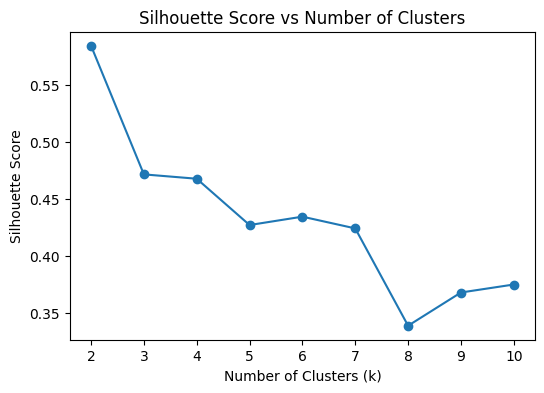

In [59]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

Plot Calinski-Harabasz Score

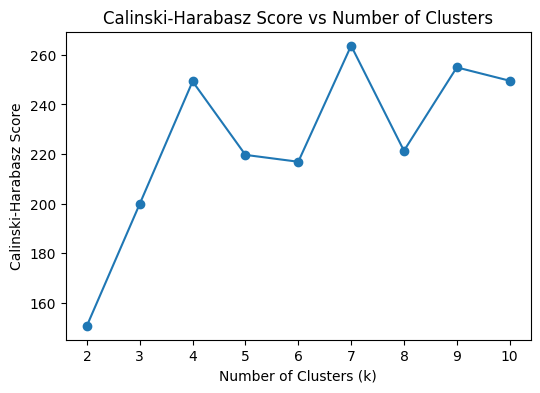

In [60]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, ch_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score vs Number of Clusters")
plt.show()

Plot Davies-Bouldin Index

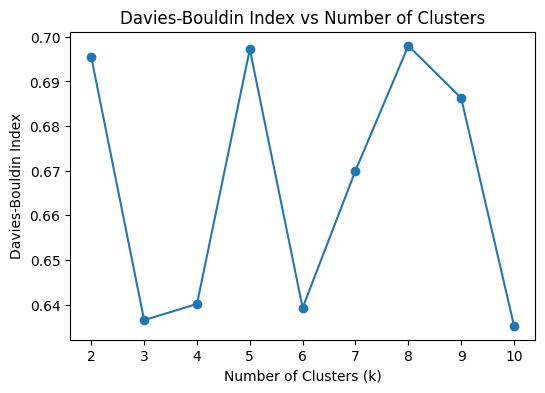

In [61]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, db_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.show()

A7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code.
for k in range(2, 20):
 kmeans = KMeans(n_clusters=k).fit(X_train)
 distorsions.append(kmeans.inertia_)
plot(distortions)

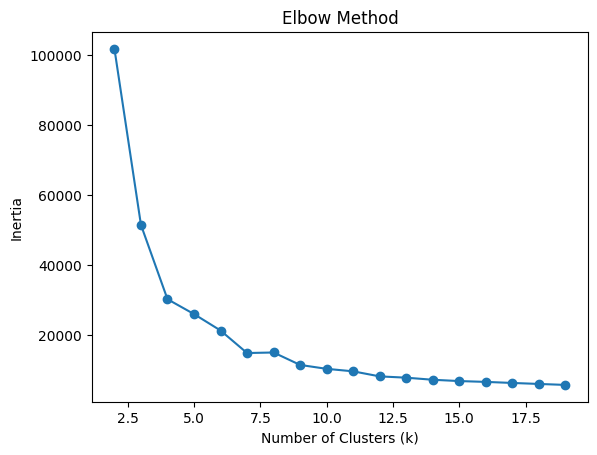

In [62]:
X_numeric = df.select_dtypes(include=['number']).drop(columns=['Real'], errors='ignore')

# Try different values of k (2 to 19)
k_values = range(2, 20)
inertia_values = []

# Compute inertia for each k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    model.fit(X_numeric)
    inertia_values.append(model.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()